<a href="https://colab.research.google.com/github/mirianbatista/abacates-fbprophet/blob/master/fbprophet_abacates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fbprophet
%matplotlib inline 
from sklearn import preprocessing
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
import warnings
warnings.filterwarnings("ignore")
import csv
import psycopg2
from sqlalchemy import create_engine
from io import StringIO
from time import sleep

In [ ]:
abacates = pd.read_csv('https://github.com/mirianbatista/abacates-fbprophet/blob/master/avocado.csv?raw=true').rename(columns={'Total Volume': 'total_volume'})
abacates.head()

,Unnamed: 0,Date,AveragePrice,total_volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df = pd.DataFrame()
df["ds"] = pd.to_datetime(abacates.Date)
df['y'] = abacates.total_volume
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      18249 non-null  datetime64[ns]
 1   y       18249 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.3 KB


In [ ]:
df = df.groupby('ds').agg({'y':'sum'})

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(df[['y']])
df['y'] = scaled_data 
df.reset_index(inplace=True)

In [ ]:
model = Prophet()
model.fit(df)
model

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [ ]:
pred = model.predict(future)
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,0.212425,0.095606,0.326311
1,2015-01-11,0.233069,0.121933,0.347096
2,2015-01-18,0.281831,0.157847,0.390180
3,2015-01-25,0.366310,0.250614,0.485007
4,2015-02-01,0.442913,0.322333,0.563221


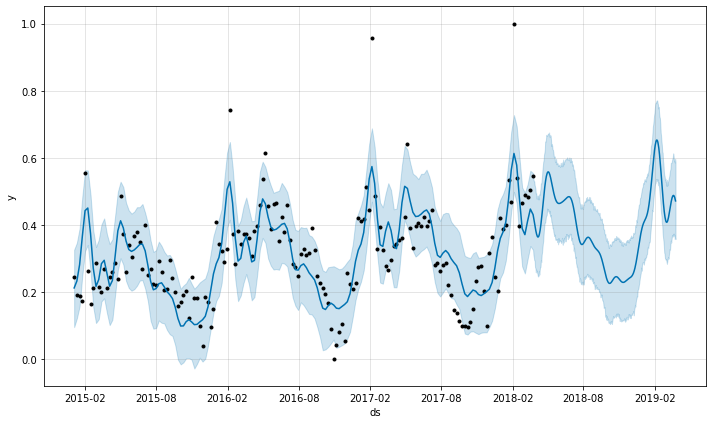

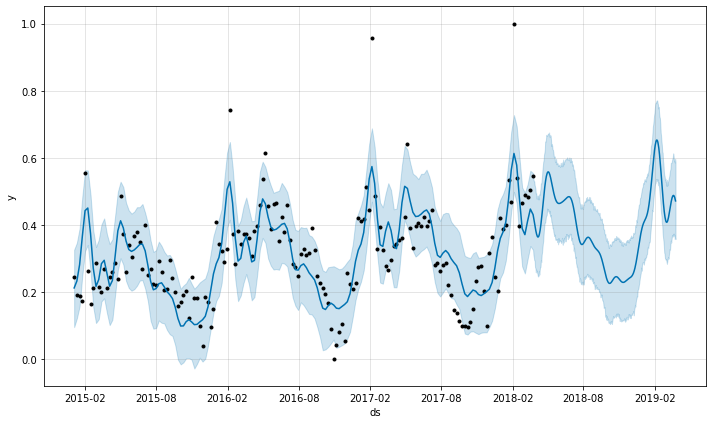

In [ ]:
model.plot(pred)

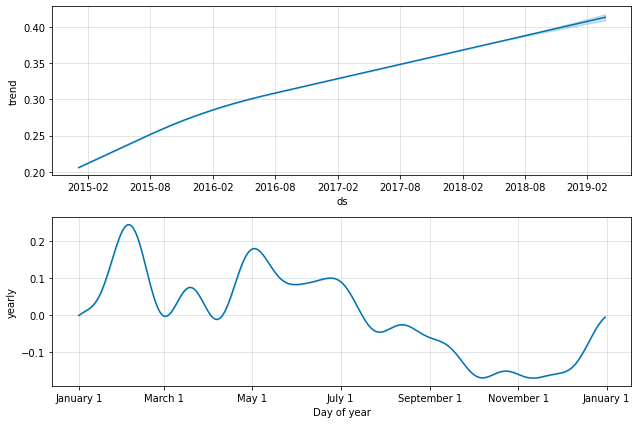

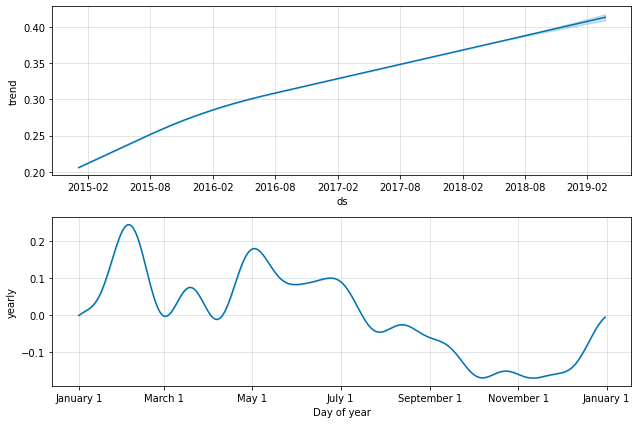

In [ ]:
model.plot_components(pred)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-03-30 00:00:00 and 2017-03-30 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 0, 'ds')

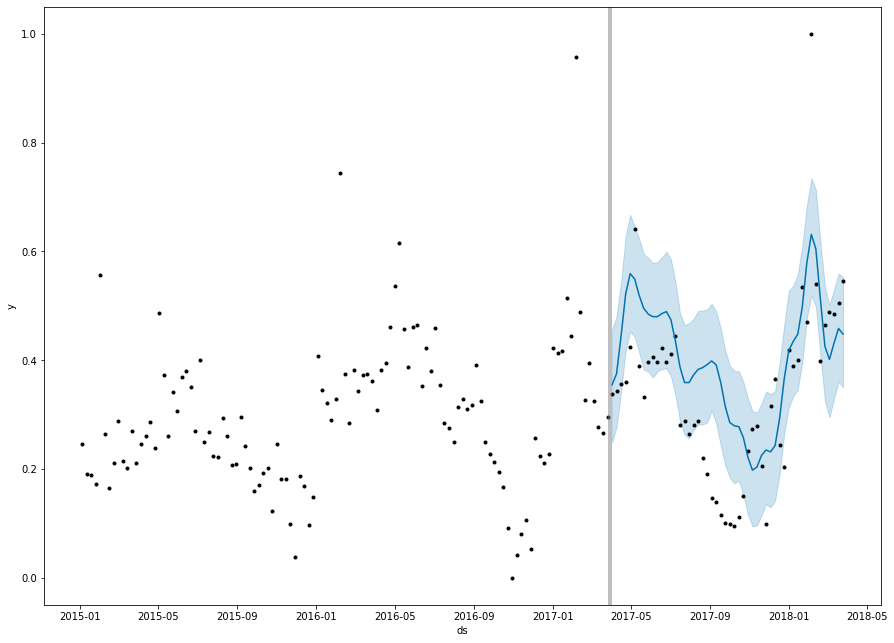

In [ ]:
df_cv = cross_validation(
    model, '360 days', initial='730 days', period='180 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(15, 11))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'].values, model.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'], df_cv['yhat_upper'], color='#0072B2', alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [ ]:
df_cv['y'] = scaler.inverse_transform(df_cv[['y']])
df_cv['yhat'] = scaler.inverse_transform(df_cv[['yhat']])

In [ ]:
df_result = df.merge(df_cv, left_on='ds', right_on='ds')
df_result['y_x'] = scaler.inverse_transform(df_result[['y_x']])
df_result = df_result[['ds','y_x','yhat']]

In [ ]:
manipulador = manipula_dw(parameters)

In [ ]:
abacates = manipulador.insere_banco(df_result,'f_abacates','replace')

In [ ]:
manipulador.requisita_dado('SELECT * FROM f_abacates',['ds','y','yhat'])